## Deap


Библиотека Neurokit2

In [42]:
import mne
import os
from tqdm import tqdm_notebook
import neurokit2 as nk
import numpy as np
import pickle
import yasa
from scipy.signal import welch

In [43]:
import warnings
import logging
import pandas as pd
warnings.filterwarnings('ignore')

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
logging.getLogger("mne").setLevel(logging.WARNING)

Порядок каналов из архива

http://www.eecs.qmul.ac.uk/mmv/datasets/deap/readme.html

data	40 x 40 x 8064	video/trial x channel x data

labels	40 x 4	video/trial x label (valence, arousal, dominance, liking)

Описание функции nk.complexity()
https://neurokit2.readthedocs.io/en/latest/functions.html#module-neurokit2.complexity

In [ ]:
n_subjects = 32
n_films = 40
n_channels = 18
ch_order = [18,    2,    3,   6,    7,    15,   10,  11,   13,   14,   31,  28,   29,   23,  24,   25,   19,    20]
ch_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for Subject in tqdm_notebook(range(1 , n_subjects + 1)):
    Subject = ('0' + str(Subject)) if Subject < 10 else str(Subject)
    raw = pickle.load(open('G:/Мой диск/Research/DEAP/s{}.dat'.foramt(Subject), 'rb'), encoding='latin1')
    for film in tqdm_notebook(range(n_films)):
        for channel in tqdm_notebook(range(n_channels)):
            if os.path.isfile('G:/Мой диск/Research/features_deap_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, ch_names[channel])):
                continue
            # Просмотр начинается с 384 сэмпла
            df, info = nk.complexity(raw['data'][film][ch_order[channel]][384:], which = ['fast', 'medium'])
            
            df['Subj'] =  Subj
            df['film'] = film + 1
            df['ch'] = channel + 1
            df['labels'] = raw['labels'][film][3]
            df.to_excel('G:/Мой диск/Research/Project2022/features_deap_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, ch_names[channel]), index=False)

In [ ]:
ch_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
neurokit_deap = pd.DataFrame()
for i in tqdm_notebook(range(32)):
    Subject = ('0' + str(i + 1)) if i + 1 < 10 else str(i + 1)
    for j in tqdm_notebook(range(40)):
        for k in tqdm_notebook(range(18)):
            neurokit_deap = pd.concat([neurokit_deap, pd.read_excel('G:/Мой диск/Research/Project2022/features_deap_neurokit/features_deap_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, j, ch_names[k]))], axis=0)

In [7]:
neurokit_deap

,ApEn,CREn,DiffEn,FI,Hjorth,Hurst,KFD,LZC,MSE,MSPEn,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,1.484383,-0.007692,2.854492,0.314085,1.522358,0.193281,3.505953,0.742818,0.307039,0.987916,...,1.601542,0.824846,1.408808,12.906891,0.803484,0.999977,1,0,Fz,7.83
0,1.556828,-0.001690,2.903278,0.284743,1.503775,0.211067,3.861489,0.761305,0.302559,0.988604,...,1.616463,0.844913,1.465049,12.906891,0.818364,1.000000,1,0,F3,7.83
0,1.585217,0.004273,2.883640,0.289118,1.580589,0.229094,3.410764,0.784833,0.303804,0.988171,...,1.601818,0.841968,1.506933,12.906891,0.811917,0.999577,1,0,F7,7.83
0,1.636149,0.008965,2.644221,0.280260,1.584523,0.216789,3.376908,0.783152,0.313923,0.987522,...,1.614030,0.847914,1.555134,12.906891,0.817692,0.999983,1,0,C3,7.83
0,1.829717,0.005163,3.007254,0.205972,1.549235,0.241468,3.858740,0.853737,0.290795,0.987040,...,1.630649,0.895176,1.777740,12.906891,0.843627,0.999926,1,0,T7,7.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.728836,-0.004444,2.797080,0.261082,1.665462,0.247139,3.471880,0.821806,0.317735,0.988659,...,1.606150,0.860561,1.656421,12.906891,0.831258,0.999998,32,39,Cz,1.88
0,1.594800,-0.055830,3.747132,0.335007,2.043562,0.331776,3.409042,0.830209,0.259786,0.987347,...,1.596723,0.810083,1.472948,12.906891,0.760206,0.999763,32,39,C4,1.88
0,1.787636,-0.016016,4.458728,0.209458,1.710900,0.373061,3.496581,0.887349,0.231478,0.986785,...,1.601611,0.893062,1.693747,12.906891,0.794703,0.999678,32,39,T8,1.88
0,1.355464,-0.034910,3.873512,0.439351,2.366161,0.372195,2.859996,0.762985,0.248196,0.987487,...,1.547087,0.730611,1.198213,12.906891,0.711782,0.999992,32,39,F4,1.88


In [8]:
#neurokit_deap.to_csv('features_deap.csv', index=False)

## Датасет из лаборатории

Neurokit2

Рейтинги : по стобцам фильмы, по строчкам испытуемые. У 11 исп. отсутсвуют два рейтинга.

In [44]:
ratings = np.array(
       [
       [10., 10.,  2.,  5.,  9.,  9.,  5.,  9.],
       [10.,  8.,  7.,  9.,  7.,  6.,  6.,  9.],
       [ 6.,  3.,  5.,  6.,  5.,  5.,  5.,  2.],
       [ 8.,  6.,  5.,  9.,  5.,  7.,  4.,  6.],
       [ 3.,  2.,  4.,  1.,  7.,  3.,  7.,  2.],
       [ 7.,  7.,  2.,  8.,  5.,  3.,  2.,  5.],
       [ 9.,  4.,  4.,  3.,  9.,  8.,  8.,  5.],
       [ 5.,  7.,  5.,  9.,  3.,  2.,  8.,  7.],
       [ 8.,  8.,  2.,  3.,  7.,  5.,  5.,  9.],
       [ 3.,  8.,  7.,  3.,  1.,  3.,  6.,  2.],
       [ 8., np.nan,  3.,  5.,  8., np.nan,  6.,  4.],
       [10.,  5.,  6.,  9., 10.,  7.,  8.,  2.]
       ]
)

In [ ]:
n_subjects = 12
n_films = 8
n_channels = 18
channel_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for Subject in tqdm_notebook(range(1, n_subjects + 1)):
    for film in tqdm_notebook(range(1, n_films + 1)):
        if not os.path.isfile('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_watch_{}.fif'.format(Subject, film)):
            continue
        if os.path.isfile('G:/Мой диск/Research/Project2022/features_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, channel_names[channel])):
            continue
        # читаем просмотр из файла
        
        raw = mne.io.read_raw('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_watch_{}.fif'.format(Subject, film))
        
        #удаляем ненужные каналы
        
        if 'VEOG' in raw.ch_names:
            raw.drop_channels(['VEOG'])
        if 'STI' in raw.ch_names:
            raw.drop_channels(['STI'])
        raw.drop_channels(['Pulse', 'Zygom', 'Corr', 'EDA', 'Mark'])
        
        for channel in tqdm_notebook(range(n_channels)):
            if os.path.isfile('G:/Мой диск/Research/Project2022/features_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, channel)):
                continue
            df, info = nk.complexity(raw[channel_names[channel]][0][0], which = ['fast', 'medium'])
            df['Subj'] =  Subject
            df['film'] = film
            df['ch'] = channel + 1
            df['labels'] = ratings[Subject - 1][film - 1]
            df.to_excel('G:/Мой диск/Research/Project2022/features_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(Subject, film, channel_names[channel]), index=False)

Мощности частот (библиотека Yasa) https://raphaelvallat.com/yasa/build/html/generated/yasa.bandpower_from_psd.html?highlight=bandpower#yasa.bandpower_from_psd

Мы добавляем построчно каждый из каналов

In [ ]:
n_subjects = 12
n_films = 8
n_channels = 18
channel_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for Subject in tqdm_notebook(range(1, n_subjects + 1)):
    frames = []
    frames_rel = []
    for film in tqdm_notebook(range(1, n_films + 1)):
        if not os.path.isfile('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_relax_before_{}.fif'.format(Subject, film)):
            continue
        relax = mne.io.read_raw('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_relax_before_{}.fif'.format(Subject, film))
        watch = mne.io.read_raw('G:/Мой диск/Research/Project2022/Cuts_filtered_40_128/{}/filtered_watch_{}.fif'.format(Subject, film))
        
        sf = relax.info['sfreq']
        win = int(4 * sf)
        
        if 'VEOG' in relax.ch_names:
            relax.drop_channels(['VEOG'])
            watch.drop_channels(['VEOG'])
        if 'STI' in relax.ch_names:
            relax.drop_channels(['STI'])
            watch.drop_channels(['STI'])
        relax.drop_channels(['Pulse', 'Zygom', 'Corr', 'EDA', 'Mark'])
        watch.drop_channels(['Pulse', 'Zygom', 'Corr', 'EDA', 'Mark'])
        

        freqs_relax, psd_relax = welch(relax.get_data() * 1e6, sf, nperseg=win, average='median')
        freqs_watch, psd_watch = welch(watch.get_data() * 1e6, sf, nperseg=win, average='median')
        
        bp_relax = yasa.bandpower_from_psd(psd_relax, freqs_relax, channel_names, bands=
                                   [(4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta')], relative=False).drop(columns=['FreqRes', 'Relative', 'TotalAbsPow'])
        bp_watch = yasa.bandpower_from_psd(psd_watch, freqs_watch, channel_names, bands=
                                   [(4, 8, 'Theta'), (8, 12, 'Alpha'), (12, 30, 'Beta')], relative=False).drop(columns=['FreqRes', 'Relative', 'TotalAbsPow'])
        bp_ratio_relax = yasa.bandpower(relax, relax.info['sfreq'], bands=
                                   [(4, 8, 'Theta_ratio'), (8, 12, 'Alpha_ratio'), (12, 30, 'Beta_ratio')], relative=True).drop(columns=['FreqRes', 'Relative'])
        bp_ratio_watch = yasa.bandpower(watch, watch.info['sfreq'], bands=
                                   [(4, 8, 'Theta_ratio'), (8, 12, 'Alpha_ratio'), (12, 30, 'Beta_ratio')], relative=True).drop(columns=['FreqRes', 'Relative'])

        for channel in tqdm_notebook(range(n_channels)):
            df_relax = pd.DataFrame(bp_relax.loc[channel]).transpose()
            df_watch = pd.DataFrame(bp_watch.loc[channel]).transpose()
            dr = pd.DataFrame(bp_ratio_relax.loc[relax.ch_names[channel]]).transpose()
            dr.rename(index={relax.ch_names[channel]:channel}, inplace=True)
            df_relax = df_relax.join(dr)
            dw = pd.DataFrame(bp_ratio_watch.loc[watch.ch_names[channel]]).transpose()
            dw.rename(index={watch.ch_names[channel]:channel}, inplace=True)
            df_watch = df_watch.join(dw)
            df_relax.rename(index={channel:'F' + str(film) + '_relax'}, inplace=True)
            df_watch.rename(index={channel:'F' + str(film) + '_watch'}, inplace=True)

            df_rel = {
                'Theta_watch-relax' : float(df_watch['Theta']) - float(df_relax['Theta']),
                'Alpha_watch-relax' : float(df_watch['Alpha']) - float(df_relax['Alpha']),
                'Beta_watch-relax' : float(df_watch['Beta']) - float(df_relax['Beta']),
            }
            df_rel = pd.DataFrame(df_rel, index=['F' + str(film) + '_' + watch.ch_names[channel]])
            df_div = {
                'Beta/Alpha' : float(df_rel['Beta_watch-relax']) / float(df_rel['Alpha_watch-relax']),
                'Beta/(Alpha + Theta)' : float(df_rel['Beta_watch-relax']) / (float(df_rel['Alpha_watch-relax'] + float(df_rel['Theta_watch-relax']))),
            }
            df_div = pd.DataFrame(df_div, index=['F' + str(film) + '_' + watch.ch_names[channel]])
            df_all = df_rel.join(df_div)
            frames_rel.append(df_all)
            frames.append(df_relax)
            frames.append(df_watch)

    result_rel = pd.concat(frames_rel)
    result_rel.to_excel('G:/Мой диск/Research/Project2022/features_yasa/S' + str(Subject) + '_ratio.xlsx')
    result = pd.concat(frames)
    result.to_excel('G:/Мой диск/Research/Project2022/features_yasa/S' + str(Subject) + '.xlsx')

In [ ]:
n_subjects = 12
n_films = 8
n_channels = 18
ind = 0
ch_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for Subject in tqdm_notebook(range(1, n_subjects + 1)):
    df_rel = pd.read_excel('G:/Мой диск/Research/Project2022/features_yasa/S{}_ratio.xlsx'.format(Subject))
    df = pd.read_excel('G:/Мой диск/Research/Project2022/features_yasa/S{}.xlsx'.format(Subject))
    first = 0
    second = 1
    for film in tqdm_notebook(range(1, n_films + 1)):
        for channel in tqdm_notebook(range(n_channels)):

            dp = df_rel.loc[(df_rel['Unnamed: 0'] == 'F' + str(film) + '_' + ch_names[channel])].rename(index={first:ind})
            d = df.loc[(df['Chan'] == ch_names[channel]) & (df['Unnamed: 0'] == 'F' + str(film) + '_watch')].rename(index={second:ind})
            if dp.empty or d.empty:
                print('{}{}{}'.format(Subject, film, ch_names[channel]))
                continue
            d['Theta_watch-relax'] = float(dp['Theta_watch-relax'])
            d['Alpha_watch-relax'] = float(dp['Alpha_watch-relax'])
            d['Beta_watch-relax'] = float(dp['Beta_watch-relax'])
            d['Beta/Alpha'] = float(dp['Beta/Alpha'])
            d['Beta/(Alpha + Theta)'] = float(dp['Beta/(Alpha + Theta)'])
            d = d.drop(['Unnamed: 0', 'Chan'], axis=1)
            d.to_excel('G:/Мой диск/Research/Project2022/features_spectral/S{}_F{}_{}_.xlsx'.format(Subject, film, ch_names[channel]), index=False)
            first += 1
            second += 2
            ind += 1

In [ ]:
ch_names = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
features_all = pd.DataFrame()
n_subjects = 12
n_films = 8
n_channels = 18
for Subject in tqdm_notebook(range(1, n_subjects + 1)):
    Subject = ('0' + str(Subject)) if Subject < 10 else str(Subject)
    for film in tqdm_notebook(range(1, n_films + 1)):
        for channel in tqdm_notebook(range(n_channels)):
            if not os.path.isfile('G:/Мой диск/Research/Project2022/features_spectral/S{}_F{}_{}_.xlsx'.format(int(Subject), film, ch_names[channel])):
                continue
            yasa = pd.read_excel('G:/Мой диск/Research/Project2022/features_spectral/S{}_F{}_{}_.xlsx'.format(int(Subject), film, ch_names[channel]))
            neurokit = pd.read_excel('G:/Мой диск/Research/Project2022/features_40_128_neurokit/S_{}_F_{}_{}_.xlsx'.format(int(Subject), film, ch_names[channel]))
            df = pd.concat([yasa, neurokit], axis=1)
            features_all = pd.concat([features_all, df], axis=0)

In [47]:
features_all

,Theta,Alpha,Beta,Theta_ratio,Alpha_ratio,Beta_ratio,TotalAbsPow,Theta_watch-relax,Alpha_watch-relax,Beta_watch-relax,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,13.008867,4.997579,6.588583,0.526244,0.203860,0.269896,24.545291,2.822392,0.978304,1.805997,...,1.640288,0.666432,1.253505,15.278301,0.700631,0.999954,1,1,1,10
0,6.609362,3.189992,5.576801,0.421152,0.211133,0.367715,15.238694,-0.296128,0.806050,2.021186,...,1.651874,0.741170,1.449528,15.278150,0.751461,0.999924,1,1,2,10
0,4.543573,2.450310,5.857017,0.348217,0.193641,0.458142,12.801766,0.110082,-0.123097,2.276599,...,1.654976,0.649358,1.179714,15.278049,0.650021,0.999934,1,1,3,10
0,9.122896,5.277992,7.450680,0.414250,0.247133,0.338618,21.968466,0.975603,1.584207,2.926163,...,1.640274,0.670234,1.247952,15.277748,0.640363,1.000000,1,1,4,10
0,3.764084,3.133160,92.449383,0.037485,0.031899,0.930616,99.653420,1.059668,0.712624,89.926041,...,1.739534,0.992793,1.669396,15.278251,0.892443,0.998940,1,1,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,8.720496,3.851477,9.021509,0.410116,0.176919,0.412965,21.800934,1.107516,-2.193685,0.777071,...,1.542705,0.385582,0.544647,15.586546,0.451471,0.999797,12,8,14,2
0,6.408689,3.310907,9.966467,0.326135,0.169916,0.503949,19.780738,0.355814,-1.368689,2.422212,...,1.558130,0.443621,0.607946,15.586709,0.461571,0.999650,12,8,15,2
0,3.515711,2.250204,10.708599,0.216626,0.135352,0.648022,16.726009,-1.599358,-0.663121,4.998161,...,1.548392,0.453187,0.541683,15.586424,0.449059,0.999922,12,8,16,2
0,4.500857,2.437937,12.810566,0.228281,0.121847,0.649872,19.760628,0.172997,-0.698937,6.929964,...,1.565545,0.478419,0.722761,15.586668,0.458831,0.999912,12,8,17,2


In [48]:
#features_all.to_csv('lab_dataset_full.csv', index=False)

## Очистка датасета от выбросов

In [ ]:
%matplotlib qt

In [50]:
import pandas as pd

In [51]:
data_all = pd.read_csv('lab_dataset_full.csv')

In [52]:
data_all.describe()

,Theta,Alpha,Beta,Theta_ratio,Alpha_ratio,Beta_ratio,TotalAbsPow,Theta_watch-relax,Alpha_watch-relax,Beta_watch-relax,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,...,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000
mean,9.711776,8.779255,17.544125,0.305800,0.249936,0.444265,37.394721,-10.528143,-4.634102,-7.468112,...,1.600195,0.610154,1.020934,15.449179,0.619987,0.998202,6.404255,4.510638,9.500000,5.776596
std,16.742271,16.117335,78.442216,0.104738,0.110380,0.128319,109.367205,382.125943,42.006491,83.581647,...,0.076295,0.202138,0.460564,0.230121,0.128684,0.023593,3.425950,2.296580,5.189661,2.485386
min,1.837110,1.120221,2.633232,0.037485,0.004373,0.112731,6.595490,-15713.035701,-1671.719526,-1042.838772,...,1.124711,0.047052,0.000055,14.931003,0.332803,0.330521,1.000000,1.000000,1.000000,1.000000
25%,4.735992,3.480184,7.347914,0.227741,0.176791,0.359925,17.558392,-2.529041,-4.223308,-5.930676,...,1.570162,0.505292,0.736035,15.278904,0.513867,0.999711,3.000000,3.000000,5.000000,4.000000
50%,7.245626,5.326990,9.710663,0.314901,0.232012,0.422717,24.316702,-0.722396,-1.416679,-1.852441,...,1.619335,0.640913,1.109920,15.485224,0.634764,0.999923,6.000000,4.500000,9.500000,6.000000
75%,10.316001,9.308987,14.884827,0.381480,0.298796,0.508884,35.767794,0.471935,0.005848,0.241667,...,1.645955,0.734987,1.315463,15.587378,0.713366,0.999986,9.000000,7.000000,14.000000,8.000000
max,301.884483,284.654359,3011.605871,0.578343,0.772661,0.930616,3395.644445,144.097473,87.779922,2982.604987,...,1.795328,0.999911,2.080944,15.764672,0.915429,1.000000,12.000000,8.000000,18.000000,10.000000


In [53]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [54]:
to_model_columns=data_all.columns
clf=IsolationForest(n_estimators=1000)
clf.fit(data_all[to_model_columns])
pred = clf.predict(data_all[to_model_columns])
data_all['anomaly'] = pred
outliers = data_all.loc[data_all['anomaly'] == -1]
outlier_index = list(outliers.index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(data_all['anomaly'].value_counts())

 1    1576
-1     116
Name: anomaly, dtype: int64


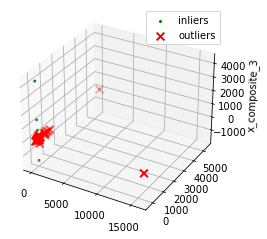

In [55]:
pca = PCA(n_components=3)
X_reduce = pca.fit_transform(data_all)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index, 0],X_reduce[outlier_index, 1], X_reduce[outlier_index, 2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [56]:
data_all = data_all[data_all['anomaly'] == 1].drop(['anomaly'], axis=1)
data_all

,Theta,Alpha,Beta,Theta_ratio,Alpha_ratio,Beta_ratio,TotalAbsPow,Theta_watch-relax,Alpha_watch-relax,Beta_watch-relax,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,13.008867,4.997579,6.588583,0.526244,0.203860,0.269896,24.545291,2.822392,0.978304,1.805997,...,1.640288,0.666432,1.253505,15.278301,0.700631,0.999954,1,1,1,10
1,6.609362,3.189992,5.576801,0.421152,0.211133,0.367715,15.238694,-0.296128,0.806050,2.021186,...,1.651874,0.741170,1.449528,15.278150,0.751461,0.999924,1,1,2,10
2,4.543573,2.450310,5.857017,0.348217,0.193641,0.458142,12.801766,0.110082,-0.123097,2.276599,...,1.654976,0.649358,1.179714,15.278049,0.650021,0.999934,1,1,3,10
3,9.122896,5.277992,7.450680,0.414250,0.247133,0.338618,21.968466,0.975603,1.584207,2.926163,...,1.640274,0.670234,1.247952,15.277748,0.640363,1.000000,1,1,4,10
5,12.466345,7.668964,7.305215,0.455908,0.279164,0.264928,27.811060,0.867278,2.583827,1.179988,...,1.621492,0.635067,1.139174,15.278251,0.710897,0.999888,1,1,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,8.720496,3.851477,9.021509,0.410116,0.176919,0.412965,21.800934,1.107516,-2.193685,0.777071,...,1.542705,0.385582,0.544647,15.586546,0.451471,0.999797,12,8,14,2
1688,6.408689,3.310907,9.966467,0.326135,0.169916,0.503949,19.780738,0.355814,-1.368689,2.422212,...,1.558130,0.443621,0.607946,15.586709,0.461571,0.999650,12,8,15,2
1689,3.515711,2.250204,10.708599,0.216626,0.135352,0.648022,16.726009,-1.599358,-0.663121,4.998161,...,1.548392,0.453187,0.541683,15.586424,0.449059,0.999922,12,8,16,2
1690,4.500857,2.437937,12.810566,0.228281,0.121847,0.649872,19.760628,0.172997,-0.698937,6.929964,...,1.565545,0.478419,0.722761,15.586668,0.458831,0.999912,12,8,17,2


In [61]:
#data_all.to_csv('lab_isolated.csv', index=False)

In [62]:
#data_all.to_csv('deap_isolated.csv', index=False)
data_all = pd.read_csv('lab_isolated.csv')
data_all

,Theta,Alpha,Beta,Theta_ratio,Alpha_ratio,Beta_ratio,TotalAbsPow,Theta_watch-relax,Alpha_watch-relax,Beta_watch-relax,...,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn,Subj,film,ch,labels
0,13.008867,4.997579,6.588583,0.526244,0.203860,0.269896,24.545291,2.822392,0.978304,1.805997,...,1.640288,0.666432,1.253505,15.278301,0.700631,0.999954,1,1,1,10
1,6.609362,3.189992,5.576801,0.421152,0.211133,0.367715,15.238694,-0.296128,0.806050,2.021186,...,1.651874,0.741170,1.449528,15.278150,0.751461,0.999924,1,1,2,10
2,4.543573,2.450310,5.857017,0.348217,0.193641,0.458142,12.801766,0.110082,-0.123097,2.276599,...,1.654976,0.649358,1.179714,15.278049,0.650021,0.999934,1,1,3,10
3,9.122896,5.277992,7.450680,0.414250,0.247133,0.338618,21.968466,0.975603,1.584207,2.926163,...,1.640274,0.670234,1.247952,15.277748,0.640363,1.000000,1,1,4,10
4,12.466345,7.668964,7.305215,0.455908,0.279164,0.264928,27.811060,0.867278,2.583827,1.179988,...,1.621492,0.635067,1.139174,15.278251,0.710897,0.999888,1,1,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,8.720496,3.851477,9.021509,0.410116,0.176919,0.412965,21.800934,1.107516,-2.193685,0.777071,...,1.542705,0.385582,0.544647,15.586546,0.451471,0.999797,12,8,14,2
1572,6.408689,3.310907,9.966467,0.326135,0.169916,0.503949,19.780738,0.355814,-1.368689,2.422212,...,1.558130,0.443621,0.607946,15.586709,0.461571,0.999650,12,8,15,2
1573,3.515711,2.250204,10.708599,0.216626,0.135352,0.648022,16.726009,-1.599358,-0.663121,4.998161,...,1.548392,0.453187,0.541683,15.586424,0.449059,0.999922,12,8,16,2
1574,4.500857,2.437937,12.810566,0.228281,0.121847,0.649872,19.760628,0.172997,-0.698937,6.929964,...,1.565545,0.478419,0.722761,15.586668,0.458831,0.999912,12,8,17,2


In [63]:
data_ours = data_all.drop(['ch', 'film', 'Subj', 'labels', 'Theta_ratio', 'Alpha_ratio', 'Beta_ratio'], axis=1)
ours_info = data_all[['ch', 'film', 'Subj', 'labels', 'Theta_ratio', 'Alpha_ratio', 'Beta_ratio']].reset_index(drop=True)
data_ours

,Theta,Alpha,Beta,TotalAbsPow,Theta_watch-relax,Alpha_watch-relax,Beta_watch-relax,Beta/Alpha,Beta/(Alpha + Theta),ApEn,...,PLZC,PSDslope,RR,SDA,SFD,SVDEn,SampEn,ShanEn,SpEn,WPEn
0,13.008867,4.997579,6.588583,24.545291,2.822392,0.978304,1.805997,1.846050,0.475175,1.398728,...,0.940935,3.028399,0.169745,0.746456,1.640288,0.666432,1.253505,15.278301,0.700631,0.999954
1,6.609362,3.189992,5.576801,15.238694,-0.296128,0.806050,2.021186,2.507521,3.963722,1.603972,...,0.923254,3.009936,0.263701,0.748870,1.651874,0.741170,1.449528,15.278150,0.751461,0.999924
2,4.543573,2.450310,5.857017,12.801766,0.110082,-0.123097,2.276599,-18.494378,-174.924676,1.362447,...,0.905958,3.169472,0.153315,0.704845,1.654976,0.649358,1.179714,15.278049,0.650021,0.999934
3,9.122896,5.277992,7.450680,21.968466,0.975603,1.584207,2.926163,1.847084,1.143117,1.403809,...,0.929404,2.984443,0.173577,0.715325,1.640274,0.670234,1.247952,15.277748,0.640363,1.000000
4,12.466345,7.668964,7.305215,27.811060,0.867278,2.583827,1.179988,0.456683,0.341916,1.270883,...,0.942088,2.977384,0.140812,0.684273,1.621492,0.635067,1.139174,15.278251,0.710897,0.999888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,8.720496,3.851477,9.021509,21.800934,1.107516,-2.193685,0.777071,-0.354231,-0.715423,0.613746,...,0.910086,3.216964,0.026419,0.697177,1.542705,0.385582,0.544647,15.586546,0.451471,0.999797
1572,6.408689,3.310907,9.966467,19.780738,0.355814,-1.368689,2.422212,-1.769732,-2.391423,0.715683,...,0.903753,3.161934,0.040831,0.595713,1.558130,0.443621,0.607946,15.586709,0.461571,0.999650
1573,3.515711,2.250204,10.708599,16.726009,-1.599358,-0.663121,4.998161,-7.537328,-2.209153,0.651076,...,0.870187,3.258573,0.043685,0.522241,1.548392,0.453187,0.541683,15.586424,0.449059,0.999922
1574,4.500857,2.437937,12.810566,19.760628,0.172997,-0.698937,6.929964,-9.915003,-13.176324,0.824445,...,0.867337,3.219369,0.052076,0.675380,1.565545,0.478419,0.722761,15.586668,0.458831,0.999912


In [64]:
from sklearn.preprocessing import MinMaxScaler
sc_ours = MinMaxScaler()
data_ours = pd.concat([pd.DataFrame(sc_ours.fit_transform(data_ours), columns=data_ours.columns).reset_index(drop=True), ours_info.reset_index(drop=True)], axis=1)
data_ours

,Theta,Alpha,Beta,TotalAbsPow,Theta_watch-relax,Alpha_watch-relax,Beta_watch-relax,Beta/Alpha,Beta/(Alpha + Theta),ApEn,...,ShanEn,SpEn,WPEn,ch,film,Subj,labels,Theta_ratio,Alpha_ratio,Beta_ratio
0,0.306417,0.051499,0.047905,0.166229,0.552600,0.766122,0.931168,0.268510,0.723673,0.657834,...,0.416636,0.656087,0.999443,1,1,1,10,0.526244,0.203860,0.269896
1,0.130892,0.027491,0.035651,0.080043,0.486594,0.764210,0.931905,0.268885,0.724264,0.757770,...,0.416455,0.746751,0.999079,2,1,1,10,0.421152,0.211133,0.367715
2,0.074232,0.017666,0.039045,0.057475,0.495192,0.753900,0.932780,0.256988,0.693936,0.640169,...,0.416334,0.565815,0.999200,3,1,1,10,0.348217,0.193641,0.458142
3,0.199833,0.055224,0.058346,0.142365,0.513512,0.772845,0.935005,0.268511,0.723786,0.660308,...,0.415972,0.548588,1.000000,4,1,1,10,0.414250,0.247133,0.338618
4,0.291537,0.086981,0.056585,0.196472,0.511219,0.783938,0.929024,0.267723,0.723650,0.595585,...,0.416575,0.674397,0.998649,6,1,1,10,0.455908,0.279164,0.264928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,0.188796,0.036277,0.077371,0.140814,0.516304,0.730923,0.927644,0.267264,0.723471,0.275618,...,0.786422,0.211665,0.997537,14,8,12,2,0.410116,0.176919,0.412965
1572,0.125388,0.029097,0.088816,0.122105,0.500393,0.740078,0.933279,0.266462,0.723187,0.325253,...,0.786617,0.229680,0.995756,15,8,12,2,0.326135,0.169916,0.503949
1573,0.046040,0.015009,0.097805,0.093816,0.459011,0.747907,0.942102,0.263194,0.723218,0.293795,...,0.786275,0.207363,0.999053,16,8,12,2,0.216626,0.135352,0.648022
1574,0.073061,0.017502,0.123262,0.121919,0.496524,0.747510,0.948719,0.261848,0.721358,0.378210,...,0.786568,0.224793,0.998933,17,8,12,2,0.228281,0.121847,0.649872


In [65]:
#data_ours.to_csv('lab_dataset_filtered.csv', index=False)